## Importar librerías

In [27]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [28]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [37]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type ='snake')
)
list(nhanes_raw_df.columns)

['general_health_condition',
 'ever_breastfed_or_fed_breastmilk',
 'age_stopped_breastfeedingdays',
 'age_first_fed_formuladays',
 'age_stopped_receiving_formuladays',
 'age_started_other_foodbeverage',
 'age_first_fed_milkdays',
 'type_of_milk_first_fed_whole_milk',
 'type_of_milk_first_fed2_milk',
 'type_of_milk_first_fed1_milk',
 'type_of_milk_first_fed_fat_free_milk',
 'type_of_milk_first_fed_soy_milk',
 'type_of_milk_first_fed_other',
 'how_healthy_is_the_diet',
 'past30_day_milk_product_consumption',
 'you_drink_whole_or_regular_milk',
 'you_drink2_fat_milk',
 'you_drink1_fat_milk',
 'you_drink_fat_freeskim_milk',
 'you_drink_soy_milk',
 'you_drink_another_type_of_milk',
 'regular_milk_use5_times_per_week',
 'how_often_drank_milk_age512',
 'how_often_drank_milk_age1317',
 'how_often_drank_milk_age1835',
 'communitygovernment_meals_delivered',
 'eat_meals_at_communitysenior_center',
 'attend_kindergarten_thru_high_school',
 'school_serves_school_lunches',
 'of_timesweek_get_school

## Procesar los datos de NHANES

In [38]:
nhanes_df = (
    nhanes_raw_df
    .select_columns(
        "general_health_condition",
        "gender",
        "age_in_years_at_screening",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "cholesterol_mg_dr1_tot"
    )
    .rename_columns(
        {
           "age_in_years_at_screening" : "age",
           "current_selfreported_height_inches" : "height",
           "current_selfreported_weight_pounds" : "weight",
           "doctor_told_you_have_diabetes" : "diabetes",
           "60_sec_pulse30_sec_pulse2" : "pulse",
           "cholesterol_mg_dr1_tot" : "total_cholesterol"
        }
    )
    .replace(
        {
            "height" : {
                9999: np.nan,
                7777: np.nan
            },
            "weight": {
                9999: np.nan,
                7777: np.nan
            },
            "diabetes": {
                "Borderline": np.nan
            }
        }
    )
    .missing.sort_variables_by_missingness()
    .dropna(
        subset = ['diabetes'],
        how = 'any'
    )
    .transform_column(
        column_name = "diabetes",
        function = lambda s: s.astype(int),
        elementwise = False
    )
)
nhanes_df

/home/esteb/miniconda3/envs/missing_values_exploration/lib/python3.9/site-packages/pandas_flavor/register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/home/esteb/miniconda3/envs/missing_values_exploration/lib/python3.9/site-packages/pandas_flavor/register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,height,weight,general_health_condition,pulse,total_cholesterol,diabetes,gender,age
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,Female,2.0
93704.0,NaN,NaN,NaN,NaN,144.0,0,Male,2.0
93705.0,63.0,165.0,Good,52.0,14.0,0,Female,66.0
93706.0,68.0,145.0,Very good,82.0,462.0,0,Male,18.0
93707.0,NaN,NaN,Good,100.0,585.0,0,Male,13.0
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,49.0,0,Male,4.0
102953.0,65.0,218.0,Fair or,78.0,306.0,0,Male,42.0
102954.0,66.0,150.0,Good,78.0,361.0,0,Female,41.0


## Visualizar los valores faltantes

<AxesSubplot:>

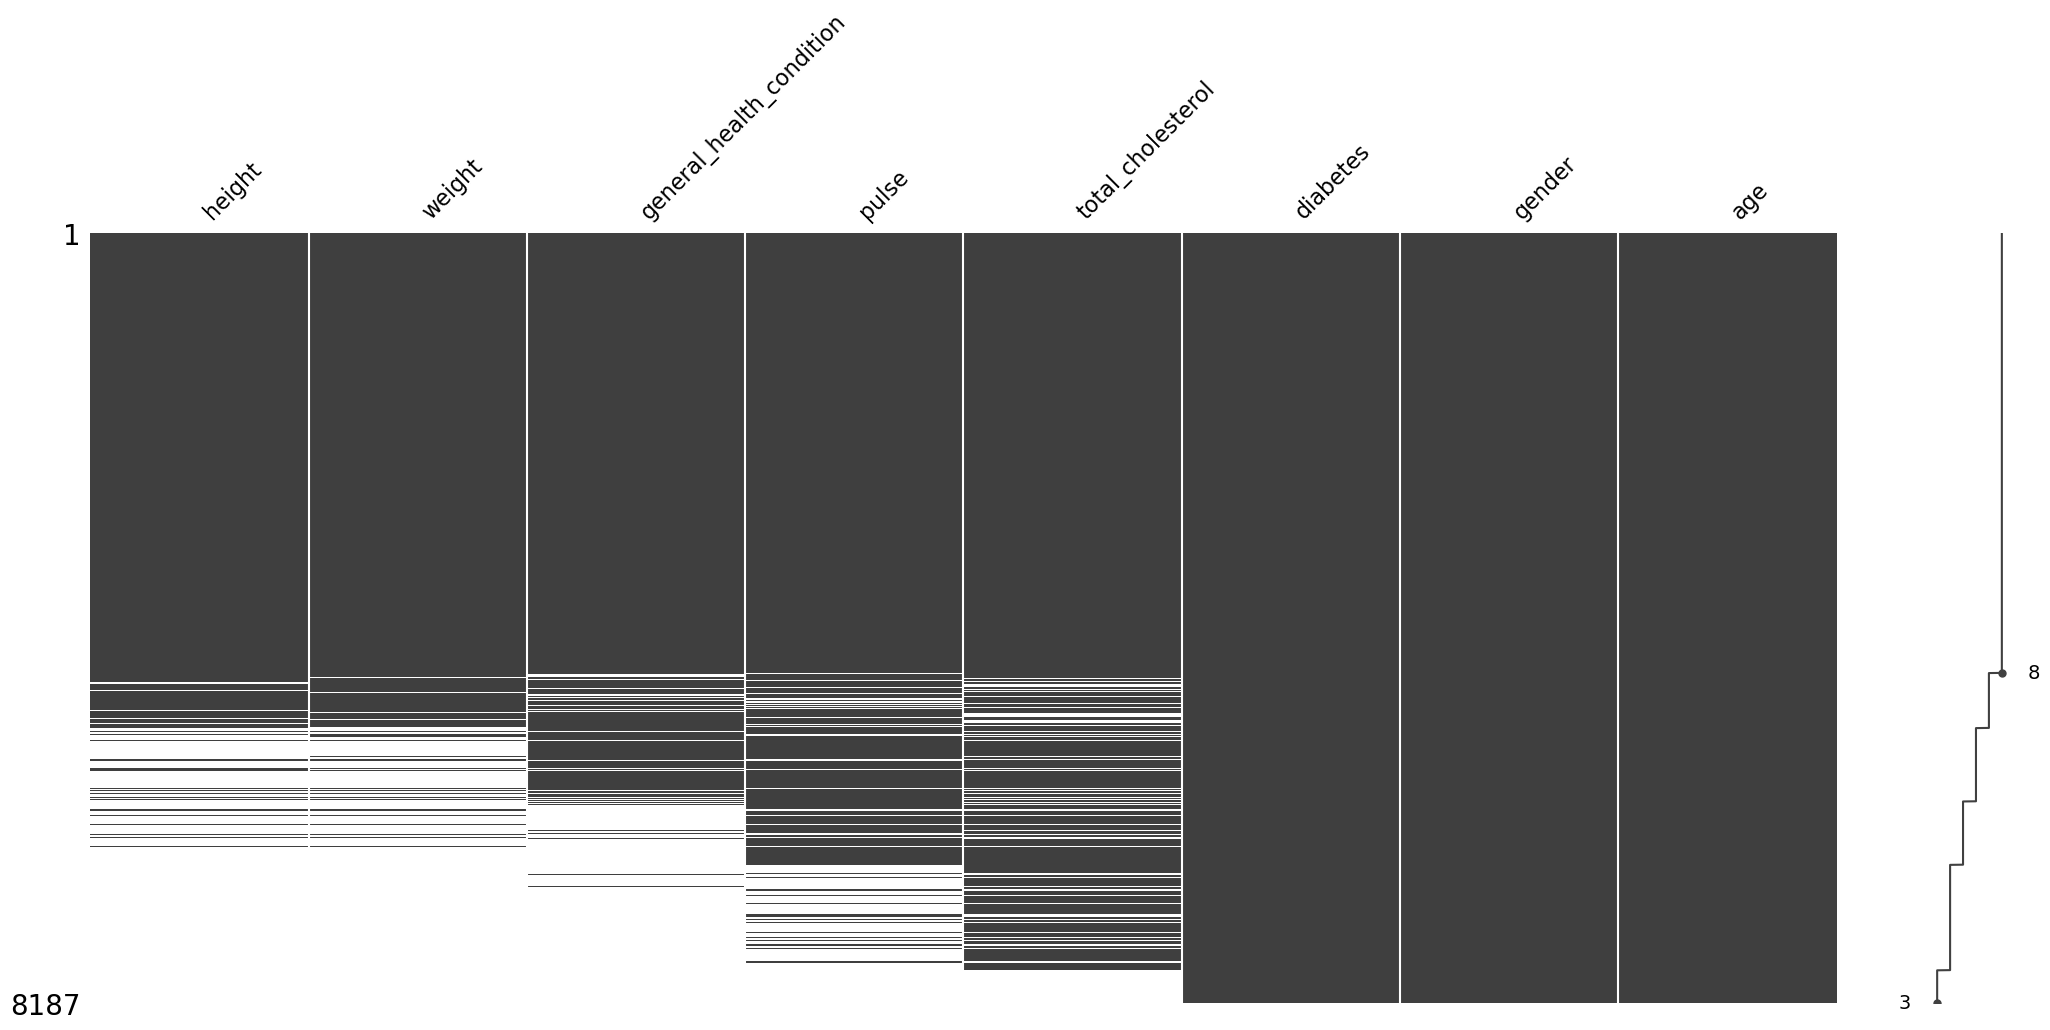

In [39]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort = 'descending')
)

/home/esteb/miniconda3/envs/missing_values_exploration/lib/python3.9/site-packages/upsetplot/plotting.py:781: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/esteb/miniconda3/envs/missing_values_exploration/lib/python3.9/site-packages/upsetplot/plotting.py:782: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

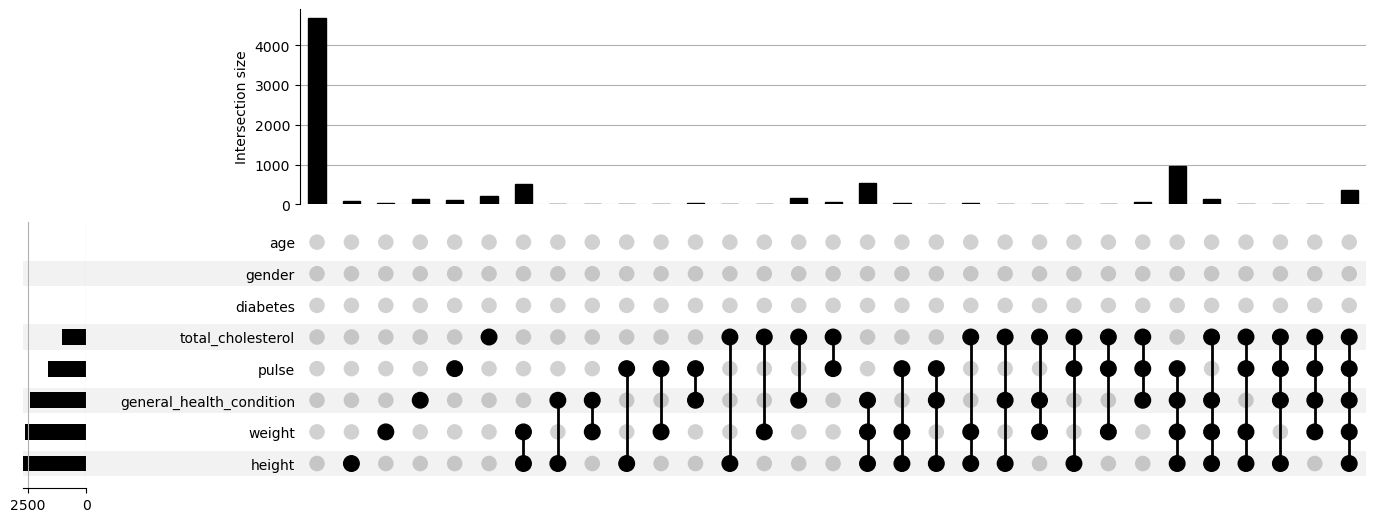

In [41]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

<AxesSubplot:>

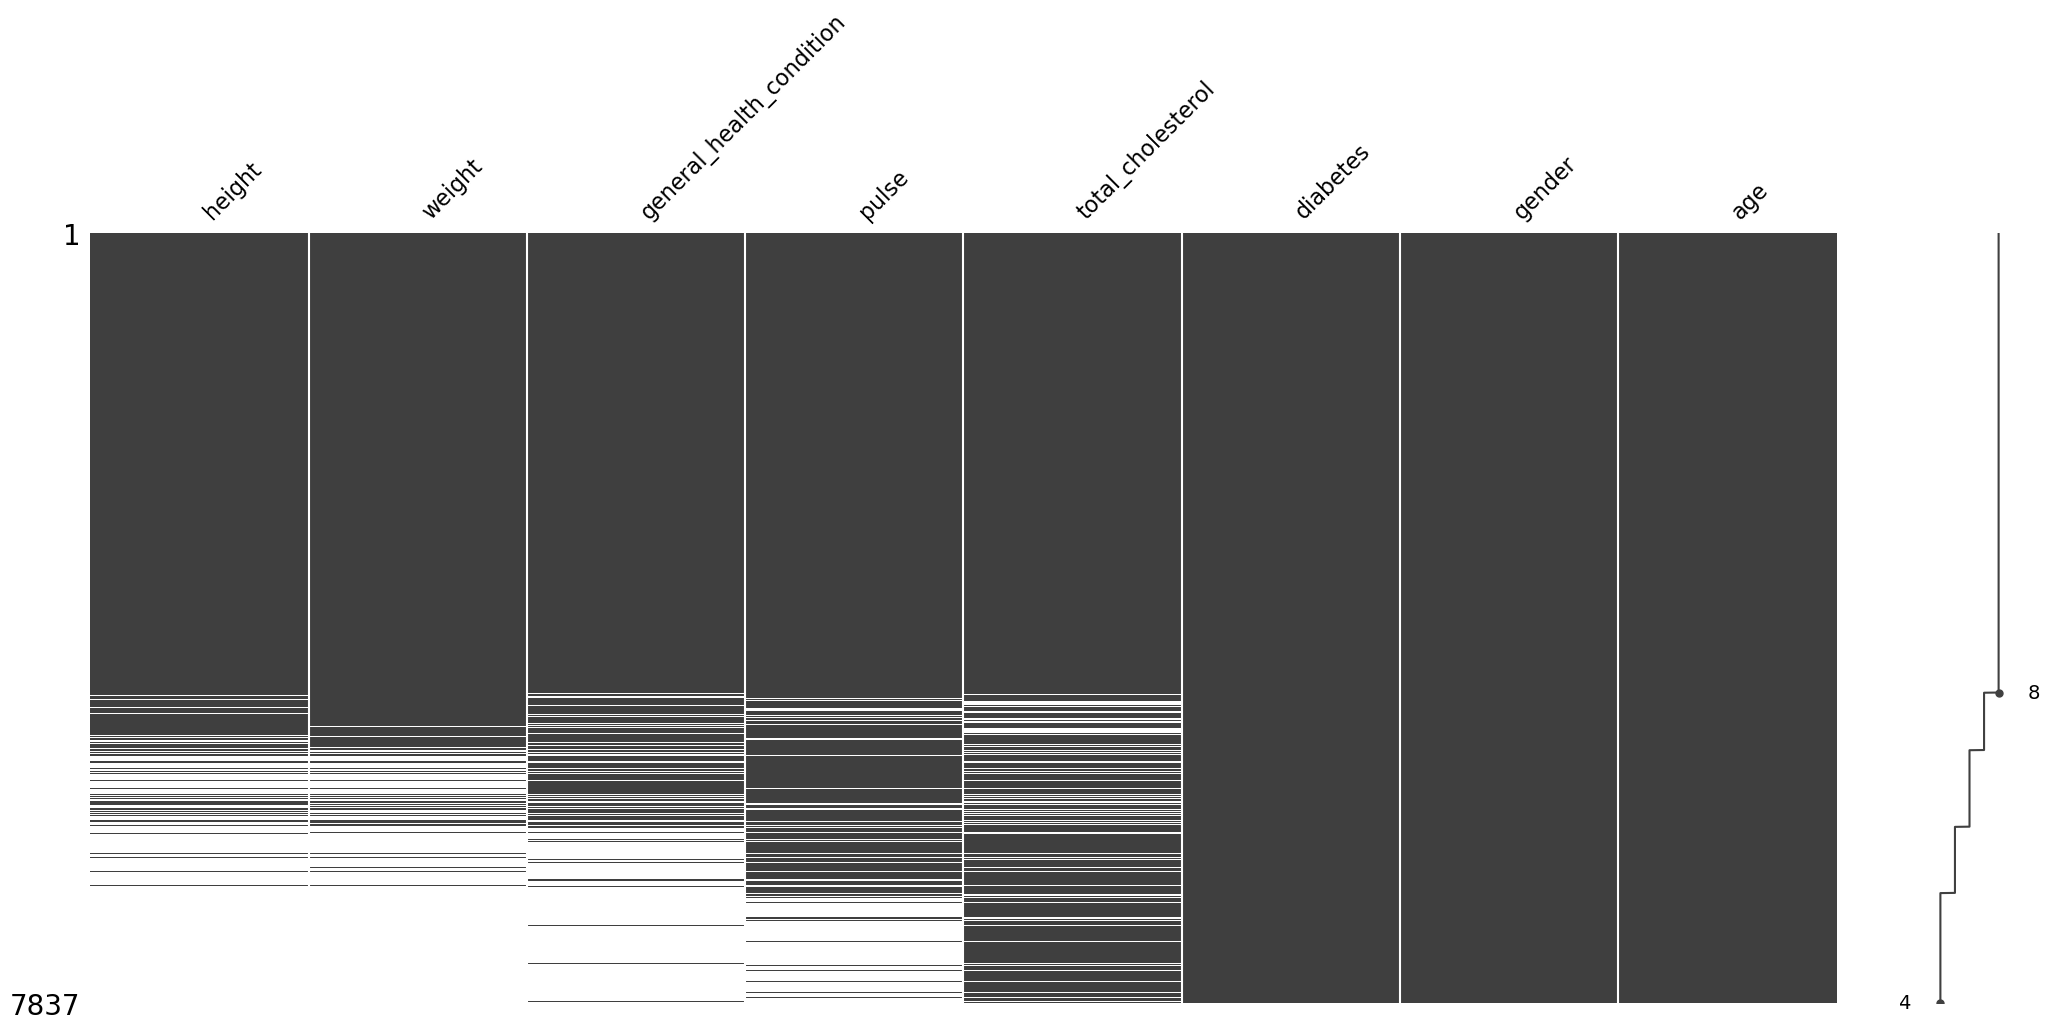

In [44]:
(
    nhanes_df
    .dropna(
        subset = ['pulse','total_cholesterol','general_health_condition',"weight"],
        how = 'all'
    )
    .missing.sort_variables_by_missingness()
    .pipe(
        missingno.matrix, sort = 'descending'
    )
)

## Eliminar valores faltantes

In [ ]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ['pulse','total_cholesterol','general_health_condition',"weight"],
        how = 'all'
    )
    .missing.sort_variables_by_missingness()
)
nhanes_df.shape

(7837, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>